# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import tensorflow as tf

Using TensorFlow backend.


## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [11]:
from keras.datasets import mnist
mnist_data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
mnist_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [13]:
mnist_data[1][0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
pd.Series(mnist_data[0][1]).count()

60000

In [0]:
dataset1 = []
dataset2 = []
dataset1_y = []
dataset2_y = []
counter=0
for i in pd.Series(mnist_data[0][1]):
  if(i<5):
    dataset1.append(mnist_data[0][0][counter])
    dataset1_y.append(mnist_data[0][1][counter])
  else:
    dataset2.append(mnist_data[0][0][counter])
    dataset2_y.append(mnist_data[0][1][counter])
  counter=counter+1
#mnist_data[0][1][0]

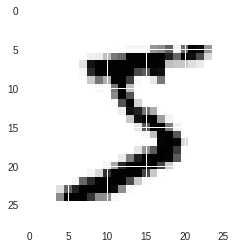

In [16]:
plt.imshow(mnist_data[0][0][0])

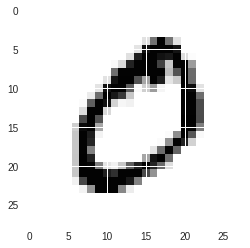

In [17]:
plt.imshow(dataset1[0])

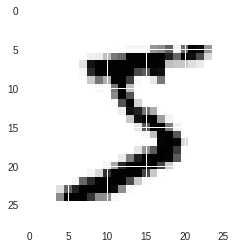

In [18]:
plt.imshow(dataset2[0])

In [19]:
dataset1_y[0]

0

In [20]:
dataset2_y[0]

5

In [21]:
pd.Series(dataset1_y).count()

30596

In [22]:
pd.Series(dataset1).count()

30596

In [23]:
pd.Series(dataset2_y).count()

29404

In [24]:
pd.Series(dataset2).count()

29404

In [25]:
mnist_data[0][0].shape

(60000, 28, 28)

In [26]:
mnist_data[1][0].shape

(10000, 28, 28)

In [27]:
pd.Series(mnist_data[1][1]).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

## 3. Print x_train, y_train, x_test and y_test for both the datasets

In [0]:
X1 = np.array(dataset1)
Y1 = np.array(dataset1_y)

In [0]:
X2 = np.array(dataset2)
Y2 = np.array(dataset2_y)

In [30]:
X1.shape

(30596, 28, 28)

In [31]:
Y1.shape

(30596,)

In [32]:
X2.shape

(29404, 28, 28)

In [33]:
Y2.shape

(29404,)

In [0]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.3,random_state=7)

In [35]:
X1_train.shape

(21417, 28, 28)

In [36]:
Y1_train.shape

(21417,)

In [37]:
Y1_train = Y1_train.reshape(Y1_train.shape[0],1)
Y1_train.shape

(21417, 1)

In [38]:
X1_test.shape

(9179, 28, 28)

In [39]:
Y1_test.shape

(9179,)

In [40]:
Y1_test = Y1_test.reshape(Y1_test.shape[0],1)
Y1_test.shape

(9179, 1)

In [0]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.3,random_state=7)

In [42]:
X2_train.shape

(20582, 28, 28)

In [43]:
Y2_train.shape

(20582,)

In [44]:
Y2_train = Y2_train.reshape(Y2_train.shape[0],1)
Y2_train.shape

(20582, 1)

In [45]:
X2_test.shape

(8822, 28, 28)

In [46]:
Y2_test.shape

(8822,)

In [47]:
Y2_test = Y2_test.reshape(Y2_test.shape[0],1)
Y2_test.shape

(8822, 1)

## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [374]:
print(X1_train.shape)
print(Y1_train.shape)
print(X1_test.shape)
print(Y1_test.shape)

(21417, 28, 28)
(21417, 1)
(9179, 28, 28)
(9179, 1)


## 5. Normalize x_train and x_test by dividing it by 255

In [0]:
X1_train = X1_train/255
X1_test = X1_test/255


In [381]:
X1_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [382]:
X1_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
Y11_train = tf.keras.utils.to_categorical(Y1_train,10,dtype='float32')
Y11_test = tf.keras.utils.to_categorical(Y1_test,10,dtype='float32')

In [384]:
Y11_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

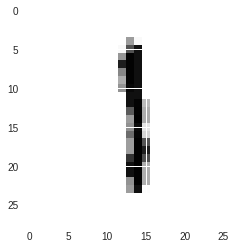

In [385]:
plt.imshow(X1_train[0])

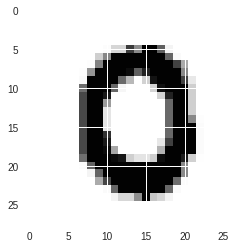

In [386]:
plt.imshow(X1_train[2])

## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [0]:
from keras.layers import Conv2D
from keras.layers import Convolution2D
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras import optimizers

In [388]:
X1_train.shape

(21417, 28, 28)

In [0]:
X1_train = X1_train.reshape(X1_train.shape[0],28,28,1)

In [390]:
X1_train.shape

(21417, 28, 28, 1)

In [391]:
X1_test.shape

(9179, 28, 28)

In [392]:
X1_test = X1_test.reshape(X1_test.shape[0],28,28,1)
X1_test.shape

(9179, 28, 28, 1)

In [393]:
Y11_train.shape

(21417, 10)

## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [414]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2)))
#model1.add(Dropout(.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
#Normalize the data
model1.add(BatchNormalization())
#model1.add(Dropout(.1))
model1.add(Dense(10,activation='softmax'))
#Normalize the data
model1.add(BatchNormalization())
#model1.add(Dropout(.1))
adagradOpt = optimizers.Adagrad(lr=0.01,decay=.01)
model1.compile(loss='categorical_crossentropy',optimizer=adagradOpt,metrics=['accuracy'])
model1.fit(x=X1_train,y=Y11_train,batch_size=51,epochs=20,validation_data=(X1_test,Y11_test))

Train on 21417 samples, validate on 9179 samples
Epoch 1/20
21417/21417 [==============================] - 15s 713us/step - loss: 8.4063 - acc: 0.8474 - val_loss: 9.3616 - val_acc: 0.9451
Epoch 2/20
21417/21417 [==============================] - 8s 355us/step - loss: 8.6098 - acc: 0.9356 - val_loss: 9.5409 - val_acc: 0.9441
Epoch 3/20
21417/21417 [==============================] - 8s 354us/step - loss: 8.8545 - acc: 0.9433 - val_loss: 10.0323 - val_acc: 0.9488
Epoch 4/20
21417/21417 [==============================] - 8s 355us/step - loss: 8.9823 - acc: 0.9473 - val_loss: 10.0039 - val_acc: 0.9517
Epoch 5/20
21417/21417 [==============================] - 8s 356us/step - loss: 9.0076 - acc: 0.9473 - val_loss: 10.1166 - val_acc: 0.9514
Epoch 6/20
21417/21417 [==============================] - 8s 355us/step - loss: 9.0224 - acc: 0.9499 - val_loss: 10.2183 - val_acc: 0.9532
Epoch 7/20
21417/21417 [==============================] - 8s 354us/step - loss: 9.1109 - acc: 0.9502 - val_loss: 10.23

In [415]:
 model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_117 (Bat (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_118 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_109 (Dense)            (None, 128)               589952    
__________

## 9. Print the training and test accuracy

In [0]:
Z1_pred = model1.predict(X1_test)

In [417]:
np.argmax(Z1_pred[0])

3

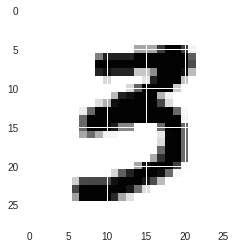

In [418]:
plt.imshow(X1_test.reshape(X1_test.shape[0],28,28)[0])

In [419]:
Y1_pred = []
for i in Z1_pred:
  Y1_pred.append(np.argmax(i))
print(np.array(Y1_pred).shape)

(9179,)


In [420]:
Y1_pred = np.array(Y1_pred).reshape(np.array(Y1_pred).shape[0],1)
Y1_pred

array([[3],
       [0],
       [1],
       ...,
       [2],
       [3],
       [2]])

In [421]:
Y1_pred.shape

(9179, 1)

In [422]:
Y1_test

array([[3],
       [3],
       [1],
       ...,
       [2],
       [3],
       [2]], dtype=uint8)

<h4>Accuracy, ConfusionMatrix and ClassificationReport for test data</h4>

In [423]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y1_test,Y1_pred))
print(classification_report(Y1_test,Y1_pred))
print(confusion_matrix(Y1_test,Y1_pred))

0.956749101209282
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1780
           1       0.98      0.97      0.97      2007
           2       0.93      0.94      0.93      1854
           3       0.95      0.91      0.93      1809
           4       0.97      0.98      0.98      1729
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96      9179
   macro avg       0.48      0.48      0.48      9179
weighted avg       0.96      0.96      0.96      9179

[[1752    1    6    6    4    3    1    0    6    1]
 [   0 1944   15   33    6    3    0    3    1    2]
 [  14    7 1737   48   28    1    0    3    7    9]
 [   9   21  109 1655   11    0    1    1    0    2]
 [   5   13

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<h4>Accuracy, ConfusionMatrix and ClassificationReport for train data</h4>

In [424]:
Z1_trainpred = model1.predict(X1_train)
Y1_trainpred = []
for j in Z1_trainpred:
  Y1_trainpred.append(np.argmax(j))
Y1_trainpred = np.array(Y1_trainpred).reshape(np.array(Y1_trainpred).shape[0],1)
Y1_trainpred
print(accuracy_score(Y1_train,Y1_trainpred))
print(classification_report(Y1_train,Y1_trainpred))
print(confusion_matrix(Y1_train,Y1_trainpred))

0.9635336414997432
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4143
           1       0.98      0.98      0.98      4735
           2       0.93      0.95      0.94      4104
           3       0.97      0.93      0.95      4322
           4       0.97      0.98      0.98      4113
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96     21417
   macro avg       0.48      0.48      0.48     21417
weighted avg       0.97      0.96      0.97     21417

[[4072    2   20   10   17    1    5    5   10    1]
 [   2 4636   27   35   19    4    0    4    1    7]
 [  45    8 3890   69   62    7    0    5    4   14]
 [  17   38  232 4007   23    2    1    0    1    1]
 [  12   2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [5]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model1.save('/content/gdrive/My Drive/AIML/Labs/R8/R8-Internal/Model04.h5',overwrite=True,include_optimizer=True)

## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [6]:
model2 = tf.keras.models.load_model('/content/gdrive/My Drive/AIML/Labs/R8/R8-Internal/Model04.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [48]:
for modelTrain in model2.layers:
  print(modelTrain.name,modelTrain.trainable)

conv2d_112 False
batch_normalization_117 True
conv2d_113 False
batch_normalization_118 True
max_pooling2d_50 True
flatten_50 True
dense_109 True
batch_normalization_119 True
dense_110 True
batch_normalization_120 True


In [49]:
for modelTrain in model2.layers:
  print(modelTrain.name,modelTrain.trainable)
  if(modelTrain.name.startswith('conv2d')):
    modelTrain.trainable = False
  #if(modelTrain.name.startswith('max'))
  print(modelTrain.name,modelTrain.trainable)

conv2d_112 False
conv2d_112 False
batch_normalization_117 True
batch_normalization_117 True
conv2d_113 False
conv2d_113 False
batch_normalization_118 True
batch_normalization_118 True
max_pooling2d_50 True
max_pooling2d_50 True
flatten_50 True
flatten_50 True
dense_109 True
dense_109 True
batch_normalization_119 True
batch_normalization_119 True
dense_110 True
dense_110 True
batch_normalization_120 True
batch_normalization_120 True


In [67]:
for modelTrain in model2.layers:
  print(modelTrain.name,modelTrain.trainable)

conv2d_112 False
batch_normalization_117 True
conv2d_113 False
batch_normalization_118 True
max_pooling2d_50 True
flatten_50 True
dense_109 True
batch_normalization_119 True
dense_110 True
batch_normalization_120 True


In [68]:
for modelTrain in model2.layers[0:5]:
  print(modelTrain.name,modelTrain.trainable)
  modelTrain.trainable=False
  print(modelTrain.name,modelTrain.trainable)

conv2d_112 False
conv2d_112 False
batch_normalization_117 True
batch_normalization_117 False
conv2d_113 False
conv2d_113 False
batch_normalization_118 True
batch_normalization_118 False
max_pooling2d_50 True
max_pooling2d_50 False


In [69]:
for modelTrain in model2.layers:
  print(modelTrain.name,modelTrain.trainable)

conv2d_112 False
batch_normalization_117 False
conv2d_113 False
batch_normalization_118 False
max_pooling2d_50 False
flatten_50 True
dense_109 True
batch_normalization_119 True
dense_110 True
batch_normalization_120 True


## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

In [51]:
X2_train.shape

(20582, 28, 28)

In [52]:
X2_test.shape

(8822, 28, 28)

In [53]:
Y2_train.shape

(20582, 1)

In [54]:
Y2_test.shape

(8822, 1)

In [55]:
pd.Series(Y2_train.reshape(Y2_train.shape[0])).value_counts()

7    4352
6    4164
9    4163
8    4122
5    3781
dtype: int64

In [56]:
Y2_train

array([[8],
       [5],
       [6],
       ...,
       [8],
       [7],
       [8]], dtype=uint8)

In [57]:
Y22_train = tf.keras.utils.to_categorical(Y2_train,num_classes=10,dtype='float32')
Y22_train.shape

(20582, 10)

In [58]:
Y22_test = tf.keras.utils.to_categorical(Y2_test,num_classes=10)
Y22_test.shape

(8822, 10)

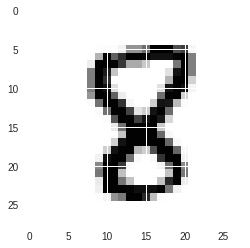

In [59]:
plt.imshow(X2_train[0])

In [60]:
Y2_train[0]

array([8], dtype=uint8)

In [0]:
X22_train = X2_train.reshape(X2_train.shape[0],28,28,1)
X22_test = X2_test.reshape(X2_test.shape[0],28,28,1)

In [0]:
X22_train = X22_train/255
X22_test =  X22_test/255

In [444]:
model2.fit(x=X22_train,y=Y22_train,validation_data=(X22_test,Y22_test),epochs=10)

Train on 20582 samples, validate on 8822 samples
Epoch 1/10
20582/20582 [==============================] - 10s 493us/sample - loss: 10.0691 - acc: 0.7387 - val_loss: 10.3956 - val_acc: 0.8371
Epoch 2/10
20582/20582 [==============================] - 8s 393us/sample - loss: 9.9141 - acc: 0.8176 - val_loss: 10.5328 - val_acc: 0.8435
Epoch 3/10
20582/20582 [==============================] - 8s 392us/sample - loss: 9.8942 - acc: 0.8196 - val_loss: 10.4027 - val_acc: 0.8313
Epoch 4/10
20582/20582 [==============================] - 8s 392us/sample - loss: 9.8927 - acc: 0.8177 - val_loss: 10.4052 - val_acc: 0.8380
Epoch 5/10
20582/20582 [==============================] - 8s 391us/sample - loss: 9.9373 - acc: 0.8271 - val_loss: 10.4141 - val_acc: 0.8471
Epoch 6/10
20582/20582 [==============================] - 8s 392us/sample - loss: 9.9171 - acc: 0.8269 - val_loss: 10.3322 - val_acc: 0.8455
Epoch 7/10
20582/20582 [==============================] - 8s 391us/sample - loss: 9.8969 - acc: 0.8269 

In [70]:
model2.output

<tf.Tensor 'batch_normalization_120/batchnorm/add_1:0' shape=(?, 10) dtype=float32>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from keras.models import Model

In [0]:
z = model2.output
z = tf.keras.layers.Dense(64, activation="relu")(z)
z = tf.keras.layers.Dense(32, activation="relu")(z)
predictions = tf.keras.layers.Dense(10, activation="softmax")(z)

# creating the final model 
model_final = tf.keras.models.Model(inputs = model2.input, outputs = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [123]:
epochs=20
# Train the model 
model_final.fit(X22_train, Y22_train, epochs = 20, validation_data=(X22_test, Y22_test),batch_size=52)

Train on 20582 samples, validate on 8822 samples
Epoch 1/20
20582/20582 [==============================] - 8s 376us/sample - loss: 0.3831 - acc: 0.9041 - val_loss: 0.0681 - val_acc: 0.9805
Epoch 2/20
20582/20582 [==============================] - 5s 220us/sample - loss: 0.0793 - acc: 0.9781 - val_loss: 0.0698 - val_acc: 0.9795
Epoch 3/20
20582/20582 [==============================] - 5s 223us/sample - loss: 0.0552 - acc: 0.9844 - val_loss: 0.5886 - val_acc: 0.9442
Epoch 4/20
20582/20582 [==============================] - 5s 221us/sample - loss: 0.0495 - acc: 0.9851 - val_loss: 0.0574 - val_acc: 0.9828
Epoch 5/20
20582/20582 [==============================] - 5s 221us/sample - loss: 0.0402 - acc: 0.9873 - val_loss: 0.0566 - val_acc: 0.9852
Epoch 6/20
20582/20582 [==============================] - 5s 220us/sample - loss: 0.0370 - acc: 0.9889 - val_loss: 0.0666 - val_acc: 0.9811
Epoch 7/20
20582/20582 [==============================] - 5s 220us/sample - loss: 0.0291 - acc: 0.9909 - val_lo

In [124]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112_input (InputLayer (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_117 (Bat (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_118 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 4608)              0         
__________

## 12. Print the accuracy for classification of digits 5 to 9

In [125]:
model_final.evaluate(X22_test,Y22_test)

8822/8822 [==============================] - 1s 113us/sample - loss: 0.0388 - acc: 0.9906


[0.03880540474777757, 0.9905917]

In [126]:
model_final.evaluate(X22_train,Y22_train)

20582/20582 [==============================] - 2s 113us/sample - loss: 0.0045 - acc: 0.9993


[0.0045104143717114, 0.9993198]

In [0]:
Z2_pred = model_final.predict(X22_test)
Y2_pred = []
for k in Z2_pred:
  Y2_pred.append(np.argmax(k))
Y2_pred = np.array(Y2_pred).reshape(np.array(Y2_pred).shape[0],1)

In [129]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y2_test,Y2_pred))
print(confusion_matrix(Y2_test,Y2_pred))

              precision    recall  f1-score   support

           5       0.98      0.99      0.99      1640
           6       1.00      0.99      0.99      1754
           7       0.99      0.99      0.99      1913
           8       0.99      0.99      0.99      1729
           9       0.99      0.99      0.99      1786

   micro avg       0.99      0.99      0.99      8822
   macro avg       0.99      0.99      0.99      8822
weighted avg       0.99      0.99      0.99      8822

[[1621    5    1    5    8]
 [  12 1739    0    2    1]
 [   0    0 1902    2    9]
 [   7    2    5 1710    5]
 [   7    1    8    3 1767]]


## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
tw = pd.read_csv('/content/gdrive/My Drive/AIML/Labs/R8/R8-Internal/tweets.csv',encoding='unicode-escape')

In [3]:
tw.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
tw.count()

tweet_text                                            9092
emotion_in_tweet_is_directed_at                       3291
is_there_an_emotion_directed_at_a_brand_or_product    9093
dtype: int64

In [0]:
tw.dropna(inplace=True)

In [6]:
tw.count()

tweet_text                                            3291
emotion_in_tweet_is_directed_at                       3291
is_there_an_emotion_directed_at_a_brand_or_product    3291
dtype: int64

### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
def preprocess(text):
    try:
        return text.decode('ascii')
    except Exception as e:
        return ""

In [0]:
tw['text'] = [preprocess(text) for text in tw.tweet_text]

In [9]:
tw

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,


### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [10]:
tw['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [11]:
tw[np.logical_or(tw['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product',tw['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell")].count()

tweet_text                                            100
emotion_in_tweet_is_directed_at                       100
is_there_an_emotion_directed_at_a_brand_or_product    100
text                                                  100
dtype: int64

In [12]:
tw[~np.logical_or(tw['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product',tw['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell")]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,


In [13]:
tw = tw[~np.logical_or(tw['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product',tw['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell")]
tw.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,


In [14]:
tw.count()

tweet_text                                            3191
emotion_in_tweet_is_directed_at                       3191
is_there_an_emotion_directed_at_a_brand_or_product    3191
text                                                  3191
dtype: int64

### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2))

In [0]:
dtm = vect.fit_transform(tw['tweet_text']).toarray()

In [18]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
np.count_nonzero(vect.get_feature_names())

29892

### 17. Find number of different words in vocabulary

In [19]:
vect.vocabulary_

{'wesley83': 28452,
 'have': 10663,
 '3g': 271,
 'iphone': 12666,
 'after': 722,
 'hrs': 11419,
 'tweeting': 27085,
 'at': 2580,
 'rise_austin': 21214,
 'it': 13187,
 'was': 28115,
 'dead': 6219,
 'need': 17094,
 'to': 26229,
 'upgrade': 27444,
 'plugin': 19651,
 'stations': 23050,
 'sxsw': 23695,
 'wesley83 have': 28453,
 'have 3g': 10664,
 '3g iphone': 277,
 'iphone after': 12672,
 'after hrs': 733,
 'hrs tweeting': 11420,
 'tweeting at': 27087,
 'at rise_austin': 2666,
 'rise_austin it': 21215,
 'it was': 13361,
 'was dead': 28132,
 'dead need': 6222,
 'need to': 17118,
 'to upgrade': 26550,
 'upgrade plugin': 27446,
 'plugin stations': 19653,
 'stations at': 23051,
 'at sxsw': 2678,
 'jessedee': 13493,
 'know': 13884,
 'about': 465,
 'fludapp': 8448,
 'awesome': 2966,
 'ipad': 12238,
 'app': 1855,
 'that': 24899,
 'you': 29497,
 'll': 14731,
 'likely': 14420,
 'appreciate': 2212,
 'for': 8540,
 'its': 13380,
 'design': 6388,
 'also': 990,
 'they': 25737,
 're': 20612,
 'giving': 95

#### Tip: To see all available functions for an Object use dir

In [26]:
dir(vect)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_limit_features',
 '_sort_features',
 '_stop_words_id',
 '_validate_params',
 '_validate_vocabulary',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transform',
 'fixed_vocabulary_',
 'get_feature_names',
 'get_params',
 'get_stop_words',
 'input',
 'inverse_transform',
 'lowercase',
 'max_df',
 'max_features',
 'min_df',


### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [27]:
tw['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [29]:
tw['label'] = tw.is_there_an_emotion_directed_at_a_brand_or_product.map({'Positive emotion':1,'Negative emotion':0})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text,Label,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,,1,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,,1,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,,1,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,,1,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,,1,1
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,,1,1
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,,1,1
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,,1,1
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,,1,1
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,,1,1


In [32]:
tw

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,,1
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,,1
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,,1
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,,1
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,,1
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,,1


### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [0]:
X = tw['tweet_text']
Y = tw['label']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [35]:
X_train.shape

(2233,)

In [36]:
X_test.shape

(958,)

In [37]:
Y_train.shape

(2233,)

In [38]:
Y_test.shape

(958,)

## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [0]:
mnb = MultinomialNB()
logr = LogisticRegression()

In [0]:
dtmTrain = vect.transform(X_train).toarray()
dtmTest = vect.transform(X_test).toarray()

In [43]:
mnb.fit(dtmTrain,Y_train)
mnb.score(dtmTest,Y_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Y_pred_mnb = mnb.predict(dtmTest)
print(accuracy_score(Y_test,Y_pred_mnb))
print(classification_report(Y_test,Y_pred_mnb))
print(confusion_matrix(Y_test,Y_pred_mnb))

0.8549060542797495
              precision    recall  f1-score   support

           0       0.54      0.45      0.49       149
           1       0.90      0.93      0.92       809

   micro avg       0.85      0.85      0.85       958
   macro avg       0.72      0.69      0.70       958
weighted avg       0.85      0.85      0.85       958

[[ 67  82]
 [ 57 752]]


In [46]:
logr.fit(dtmTrain,Y_train)
logr.score(dtmTest,Y_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Y_pred_logr = logr.predict(dtmTest)
print(accuracy_score(Y_test,Y_pred_logr))
print(classification_report(Y_test,Y_pred_logr))
print(confusion_matrix(Y_test,Y_pred_logr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8768267223382046
              precision    recall  f1-score   support

           0       0.75      0.31      0.44       149
           1       0.89      0.98      0.93       809

   micro avg       0.88      0.88      0.88       958
   macro avg       0.82      0.65      0.68       958
weighted avg       0.86      0.88      0.85       958

[[ 46 103]
 [ 15 794]]


## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [0]:
def tokenize_predict(vect):
  vect.fit(X_train)
  dtmTr = vect.transform(X_train)
  dtmTe = vect.transform(X_test)
  mnb.fit(dtmTr,Y_train)
  mnb.score(dtmTe,Y_test)
  from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
  Y_pred_mnb = mnb.predict(dtmTe)
  print(accuracy_score(Y_test,Y_pred_mnb))
  print(classification_report(Y_test,Y_pred_mnb))
  print(confusion_matrix(Y_test,Y_pred_mnb))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [52]:
cv_12 = CountVectorizer(ngram_range=(1,2))
tokenize_predict(cv_12)

0.8736951983298539
              precision    recall  f1-score   support

           0       0.94      0.20      0.33       149
           1       0.87      1.00      0.93       809

   micro avg       0.87      0.87      0.87       958
   macro avg       0.90      0.60      0.63       958
weighted avg       0.88      0.87      0.84       958

[[ 30 119]
 [  2 807]]


### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [53]:
cv_sw = CountVectorizer(stop_words='english')
tokenize_predict(cv_sw)

0.8674321503131524
              precision    recall  f1-score   support

           0       0.76      0.21      0.34       149
           1       0.87      0.99      0.93       809

   micro avg       0.87      0.87      0.87       958
   macro avg       0.82      0.60      0.63       958
weighted avg       0.86      0.87      0.83       958

[[ 32 117]
 [ 10 799]]


### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [54]:
cv_sw_300 = CountVectorizer(stop_words='english',max_features=300)
tokenize_predict(cv_sw_300)

0.8402922755741128
              precision    recall  f1-score   support

           0       0.48      0.36      0.41       149
           1       0.89      0.93      0.91       809

   micro avg       0.84      0.84      0.84       958
   macro avg       0.68      0.65      0.66       958
weighted avg       0.82      0.84      0.83       958

[[ 54  95]
 [ 58 751]]


### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [55]:
cv_sw_15000 = CountVectorizer(stop_words='english',max_features=15000)
tokenize_predict(cv_sw_15000)

0.8674321503131524
              precision    recall  f1-score   support

           0       0.76      0.21      0.34       149
           1       0.87      0.99      0.93       809

   micro avg       0.87      0.87      0.87       958
   macro avg       0.82      0.60      0.63       958
weighted avg       0.86      0.87      0.83       958

[[ 32 117]
 [ 10 799]]


### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [59]:
cv_min = CountVectorizer(ngram_range=(1,2),min_df=2)
tokenize_predict(cv_min)

0.8768267223382046
              precision    recall  f1-score   support

           0       0.69      0.38      0.49       149
           1       0.89      0.97      0.93       809

   micro avg       0.88      0.88      0.88       958
   macro avg       0.79      0.67      0.71       958
weighted avg       0.86      0.88      0.86       958

[[ 56  93]
 [ 25 784]]
